# Import Moduli

In [3]:
import numpy as np
import pandas as pd
import csv
import openpyxl
import re
import glob
import os
from os.path import exists as file_exists
import matplotlib.pyplot as plt
import scipy
from scipy import stats

# Set Parameters

In [4]:
uL_plasma = 5

cys_factor = 1.0213
hcy_factor = 1.6548

x1_values = [12.5,25,50,100,200,400]                      #Standard cysteine concentrations
x2_values = [18.75,37.5,75,150,300,600]                   #Standard homocysteine concentrations

peak_1_min = 1.6                                          #Set time window to look for peaks
peak_1_max = 1.8

peak_2_min = 3.2
peak_2_max = 3.4

peak_3_min = 6.1
peak_3_max = 6.2

minimum_peak_area = 10                                    #Sensitivity

# Define Functions

In [5]:
def calculate_standards(file_name):
    with open(file_name, encoding="utf-16", errors='ignore') as f:
        contents = f.read()

    l = re.split('[^0-9.]', contents)
    l1 = [l[i] for i in range(0, len(l), 2)]
    l2 = [l[i] for i in range(1, len(l), 2)]

    time = []
    area = []
    for i in range(len(l2)):
        A = l1[i]
        B = l2[i]
        floatA = float(A)
        floatB = float(B)
        if peak_1_min <= floatA <= peak_1_max or peak_2_min <= floatA <= peak_2_max or peak_3_min <= floatA <= peak_3_max:
            if minimum_peak_area <= floatB:
                r1 = l1[i]
                r2 = l2[i]
                newtime = time.append(r1)
                newarea = area.append(r2)
                if len(area) > 3:
                    print('check ' + file_name + ' manually!')
                    return
            else:
                print('check ' + file_name + ' manually!')
                return
    
    cys = area[0]
    hcy = area[1]
    std = area[2]
    adj_cys = float(cys)/float(std)
    adj_hcy = float(hcy)/float(std)
    
    cys_values = y1_values.append(adj_cys)
    hcy_values = y2_values.append(adj_hcy)

        
        
def calculate_HPLC_results(file_name):
    with open(file_name, encoding="utf-16", errors='ignore') as f:
        contents = f.read()

    l = re.split('[^0-9.]', contents)    
    l1 = [l[i] for i in range(0, len(l), 2)]
    l2 = [l[i] for i in range(1, len(l), 2)]

    time = []
    area = []
    for i in range(len(l2)):
        A = l1[i]
        B = l2[i]
        floatA = float(A)
        floatB = float(B)
        if peak_1_min <= floatA <= peak_1_max or peak_2_min <= floatA <= peak_2_max or peak_3_min <= floatA <= peak_3_max:
            if minimum_peak_area <= floatB:
                r1 = l1[i]
                r2 = l2[i]
                newtime = time.append(r1)
                newarea = area.append(r2)
                if len(area) > 3:
                    print('check ' + file_name + ' manually or change bounds!')
                    return
            else:
                print('check ' + file_name + ' manually or change bounds!')
                return
                
    cys = area[0]
    hcy = area[1]
    std = area[2]
    adj_cys = float(cys)/float(std)
    adj_hcy = float(hcy)/float(std)

    conc_cys = ((adj_cys-int_cys)/slope_cys)*cys_factor
    conc_hcy = ((adj_hcy-int_hcy)/slope_hcy)*hcy_factor

    final_cys = (10/uL_plasma)*conc_cys
    final_hcy = (10/uL_plasma)*conc_hcy

    data = pd.DataFrame({'Time':[time[0],time[1],time[2]],'Area':[area[0],area[1],area[2]],'Adj':[adj_cys, adj_hcy, '1'],'Conc':[conc_cys, conc_hcy, None],'Final':[final_cys, final_hcy, file_name]})
    index_ = ['Cys', 'Hcy', 'Std']
    data.index = index_
    
    new_file_name = file_name.removesuffix('.CSV')
    running_ids = ids.append(new_file_name)
    final_cys_values = final_cysteine.append(final_cys)
    final_hcy_values = final_homocysteine.append(final_hcy)
    
    if file_exists('compiled.xlsx'):
        with pd.ExcelWriter('compiled.xlsx', engine="openpyxl", mode='a', if_sheet_exists='replace') as writer:  
            data.to_excel(writer, sheet_name=file_name, index=True)
    else:
        data.to_excel('compiled.xlsx', sheet_name=file_name, index=True)

# Get Standard

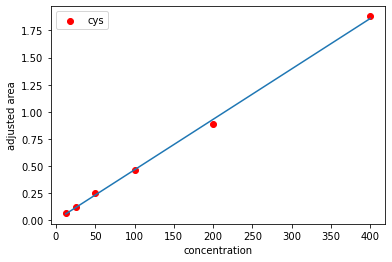

r-squared cys =  0.9988046024941847


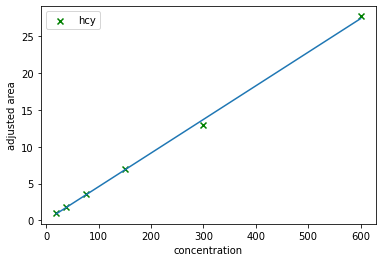

r-squared hcy =  0.9985190146227263


In [6]:
y1_values = []
y2_values = []
substring = 'STD'                                         #Include files with 'STD'
path = os.getcwd()
files = glob.glob(os.path.join(path, "*.csv"))
for file in files:
    file_name = file.split("\\")[-1]
    if re.match(substring, file_name, re.IGNORECASE):
        calculate_standards(file_name)

plt.scatter(x1_values, y1_values, marker='o', linestyle='None', color='r', label='cys') 
plt.xlabel('concentration')
plt.ylabel('adjusted area')
plt.legend()
trend1 = np.polyfit(x1_values, y1_values, 1)
poly1 = np.poly1d(trend1)
new_x1 = np.linspace(x1_values[0], x1_values[-1])
new_y1 = poly1(new_x1)
plt.plot(new_x1, new_y1)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1_values, y1_values)
plt.show()
plt.clf()

int_cys = intercept1
slope_cys = slope1
print('r-squared cys = ', r_value1**2)

plt.scatter(x2_values, y2_values, marker='x', linestyle='None', color='g', label='hcy') 
plt.xlabel('concentration')
plt.ylabel('adjusted area') 
plt.legend()
trend2 = np.polyfit(x2_values, y2_values, 1)
poly2 = np.poly1d(trend2)
new_x2 = np.linspace(x2_values[0], x2_values[-1])
new_y2 = poly2(new_x2)
plt.plot(new_x2, new_y2)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2_values, y2_values)
plt.show()

int_hcy = intercept2
slope_hcy = slope2
print('r-squared hcy = ', r_value2**2)

# Get Data

In [56]:
#Get sample data
ids = []
final_cysteine = []
final_homocysteine = []
substring = 'STD'                                         #Exclude files with 'STD'
path = os.getcwd()
files = glob.glob(os.path.join(path, "*.csv"))
for file in files:
    file_name = file.split("\\")[-1]
    if re.match(substring, file_name, re.IGNORECASE):
        pass
    else:
        calculate_HPLC_results(file_name)
        
final_data = pd.DataFrame(list(zip(ids, final_cysteine, final_homocysteine)),
               columns =['ID', 'cysteine','homocysteine'])
final_data.to_excel('final_data.xlsx')